#**DEEP LEARNING FOR COMPUTER VISION**

Select a publicly available image dataset (Recommended 1000-2000 images in total)!

Make groups of 5 people.

Topics to choose:
1. Crowd Counting
2. Object Detection
3. Image Segmentation
4. Image Classification + Attention Map Visualization

- Train a model using Keras/PyTorch
- Evaluate the model
- Present the results in the last meeting

Presentation Outline:
- Problem description
- Method/Model + justification
- Evaluation Method
- Results
- Conclusion

Make a poster that can pack all of the points above! Feel free to use your poster/PPT to present in the final session.

Poster: https://www.canva.com/design/DAGAr1HS2z8/itZDo84iR98CXQvnVdhQHw/edit?utm_content=DAGAr1HS2z8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton.

Bonus points for groups who can train and test at least 3 models and compare them.

Choose a topic max on week 3.

In [83]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, layers, models, optimizers
from tensorflow.keras.models import Model, Sequential, load_model


In [54]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
 #   raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [55]:
train_csv_path = r"C:\Users\Fiona\Documents\coolyeah\Semester 4\Deep Learning\Project\butterfly_classification\Training_set.csv"
train_img_dir = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/"


In [56]:
#read the csv file
data = pd.read_csv(train_csv_path)
data.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [57]:
#add path

data['path'] = train_img_dir + data["filename"]

data.head()

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1,Image_2.jpg,ADONIS,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2,Image_3.jpg,BROWN SIPROETA,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
3,Image_4.jpg,MONARCH,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
4,Image_5.jpg,GREEN CELLED CATTLEHEART,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


EXPLORATORY DATA ANALYSIS (EDA)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
 2   path      6499 non-null   object
dtypes: object(3)
memory usage: 152.4+ KB


Butterfly Class

In [59]:
bt_classes = data["label"].unique()
bt_class_num = data["label"].nunique()

print("Classes: ")
print(bt_classes)

print("Number of Classes: ")
print(bt_class_num)

#bt_classes --> mengambil unique value dari "label"
#bt_class_num --> menghitung unique class dari "label"
#print bt_classes --> print hasil dari unique value yang sudah diambil dari "label"
#print bt_class_num --> print hasil unique class yang sudah dihitung dari "label"

#brandon

Classes: 
['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY'

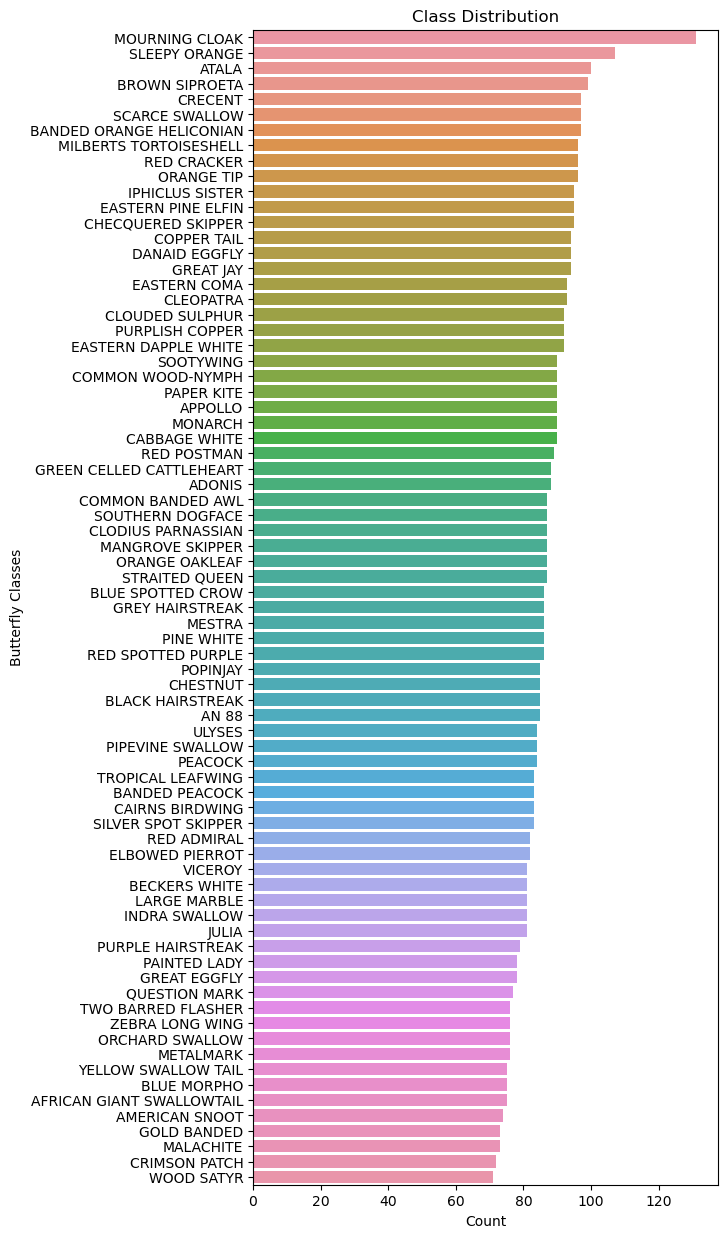

In [60]:
#Jumlah kupu-kupu per jenis
plt.figure(figsize = (6, 15))
sns.countplot(y = "label", data = data, order = data["label"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Butterfly Classes")
plt.title("Class Distribution")
plt.show()

Train Test Split

In [61]:
#split data
train_data, val_data = train_test_split(data, test_size = 0.2, random_state = 10)

# train_data --> data yang digunakan untuk training
# val_data --> data yang digunakan untuk menguji atau mengevaluasi
# train_test_split --> function untuk melakukan training data (membagi 2 data menjadi train_data dan val_data); training dan validasi
# test_size --> untuk membagi jumlah yang data yang ditraining dan validasi (0.3 berarti validasinya 30% dan trainingnya 70%)
# random_state --> untuk menentukan seed atau nilai awal random generator dari hasil pembagian data set



In [62]:
print(train_data['path'].head())
print(val_data['path'].head())

# train_data --> train datanya, head() untuk menampilkan sejumlah row pertama. Contoh: head(10) maka yang ditampilkan adalah 10 row pertama / teratas
# val_data --> validasi datanya, head() untuk menampilkan sejumlah row pertama. Contoh: head(10) maka yang ditampilkan adalah 10 row pertama / teratas

2705    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2120    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2145    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2756    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
398     C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
Name: path, dtype: object
5748    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2529    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
5030    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
5143    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1551    C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
Name: path, dtype: object


In [63]:
import os

# Check a few paths to see if they exist
for path in train_data['path'].head():
    print(os.path.exists(path), path)

for path in val_data['path'].head():
    print(os.path.exists(path), path)


True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_2706.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_2121.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_2146.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_2757.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_399.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_5749.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_2530.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/Image_5031.jpg
True C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Le

In [64]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_set = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = "sparse"
    )

val_datagen = ImageDataGenerator(rescale = 1.0 / 255)

val_set = train_datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = "sparse"
    )

# train_datagen dan val_datagen = menggunakan Image Data Generator mempersiapkan gambar-gambar agar model machine learning dapat belajar lebih efektif.
# rescale = 1.0 / 255 mengubah nilai piksel gambar menjadi rentang antara 0 dan 1. membantu dalam pelatihan model dan meningkatkan kinerja model.

# flow_from_dataframe = memungkinkan mengubah data pada dataframe menjadi aliran data yang sesuai untuk train dan validation machine learning.
# dataframe = sumber data
# x_col = column gambar
# y_col = column label/clasess
# target_size = ukuran target adalah 180px * 180px
# class_mode = bahwa label kelas yang digunakan adalah bilangan bulat (integer)

#louis

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [65]:
print(train_set)

In [66]:
images, labels = next(train_set)
print(labels)

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

print(class_names)

# next --> untuk retrieve first batch dari dari train_set
# image --> isi batch gambar
# labels --> label yang sesuai dengan gambar
# print(labels) --> print label dari batch-batch gambar yang diambil dari train_set
# train_set.class_indices --> melakukan mapping class name ke numeric indeks
# class_names = {v: k for k, v in class_names.items()} --> meng-access class name menggunakan numeric indeks
# print(class_names) --> print hasil class_names

#brandon

[27. 41. 62. 46. 23. 68. 65. 38. 47. 42. 29. 46. 51. 65. 33. 53.]
{0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'AN 88', 4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK', 8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW', 12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHECQUERED SKIPPER', 16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR', 20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRECENT', 24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMA', 27: 'EASTERN DAPPLE WHITE', 28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY', 32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOW', 36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE', 40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL', 44:

In [67]:
print(images.shape)
#16 = batch_size, setiap 16 gambar diambil
#180 = perkalian pixel, lebar
#180 = perkalian pixel, tinggi
#3 = jumlah channel RGB

(16, 224, 224, 3)


In [68]:
print(images[0].shape)
print(images[0]) #nilai intensitas warna dari gambar pertama
#tiap channel mempunyai

(224, 224, 3)
[[[0.4039216  0.40000004 0.03921569]
  [0.40784317 0.4039216  0.04313726]
  [0.41176474 0.40784317 0.04705883]
  ...
  [0.3921569  0.37647063 0.01960784]
  [0.39607847 0.3803922  0.02352941]
  [0.3921569  0.37647063 0.01960784]]

 [[0.4039216  0.40000004 0.03921569]
  [0.40784317 0.4039216  0.04313726]
  [0.40784317 0.4039216  0.04313726]
  ...
  [0.38823533 0.37254903 0.01568628]
  [0.3921569  0.37647063 0.01960784]
  [0.38823533 0.37254903 0.01568628]]

 [[0.40784317 0.4039216  0.04313726]
  [0.40784317 0.4039216  0.04313726]
  [0.40784317 0.4039216  0.04313726]
  ...
  [0.38431376 0.3803922  0.01960784]
  [0.38431376 0.3803922  0.01960784]
  [0.38431376 0.3803922  0.01960784]]

 ...

 [[0.36078432 0.37254903 0.03137255]
  [0.3647059  0.37647063 0.03529412]
  [0.3647059  0.37647063 0.03529412]
  ...
  [0.3921569  0.38823533 0.0627451 ]
  [0.38823533 0.38431376 0.05882353]
  [0.38823533 0.38431376 0.05882353]]

 [[0.36078432 0.37254903 0.03137255]
  [0.3647059  0.3764706

In [69]:
print(images[0][0]) #nilai intensitas warna dari baris pertama gambar pertama

[[0.4039216  0.40000004 0.03921569]
 [0.40784317 0.4039216  0.04313726]
 [0.41176474 0.40784317 0.04705883]
 [0.4156863  0.41176474 0.0509804 ]
 [0.41176474 0.40784317 0.04313726]
 [0.4039216  0.40000004 0.03529412]
 [0.40784317 0.4039216  0.03921569]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.41176474 0.40784317 0.04313726]
 [0.4156863  0.41176474 0.04705883]
 [0.40784317 0.40784317 0.03137255]
 [0.41176474 0.41176474 0.03529412]
 [0.41176474 0.41176474 0.03529412]
 [0.40784317 0.40784317 0.03137255]
 [0.40784317 0.40784317 0.02352941]
 [0.40784317 0.40784317 0.02352941]
 [0.41176474 0.41176474 0.02745098]
 [0.41176474 0.41176474 0.02745098]
 [0.41176474 0.41176474 0.02745098]
 [0.41176474 0.41176474 0.02745098]
 [0.41176474 0.41176474 0.02745098]
 [0.40784317 0.4156863  0.02

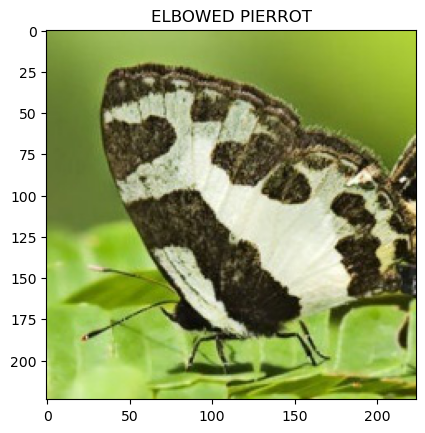

In [70]:
i = 10
plt.figure()
plt.imshow(images[i], cmap = plt.cm.binary)
plt.title(class_names[labels[i]])
plt.show()

# define i = 10
# plt.figure() = untuk membuat gambar baru yang akan ditampilkan. (seperti newfile di docs)
# plt.imshow(images[i], cmap = plt.cm.binary) = untuk mengenerate gambar ke i (i=10) dengan images[i] dan cmap = plt.cm.binary untuk memberikan warna
# plt.title(class_names[labels[i]]) = membuat title class berdasarkan labels data ke i [i=10] dari kolom class_name
# plt.show() = memberikan output gambar

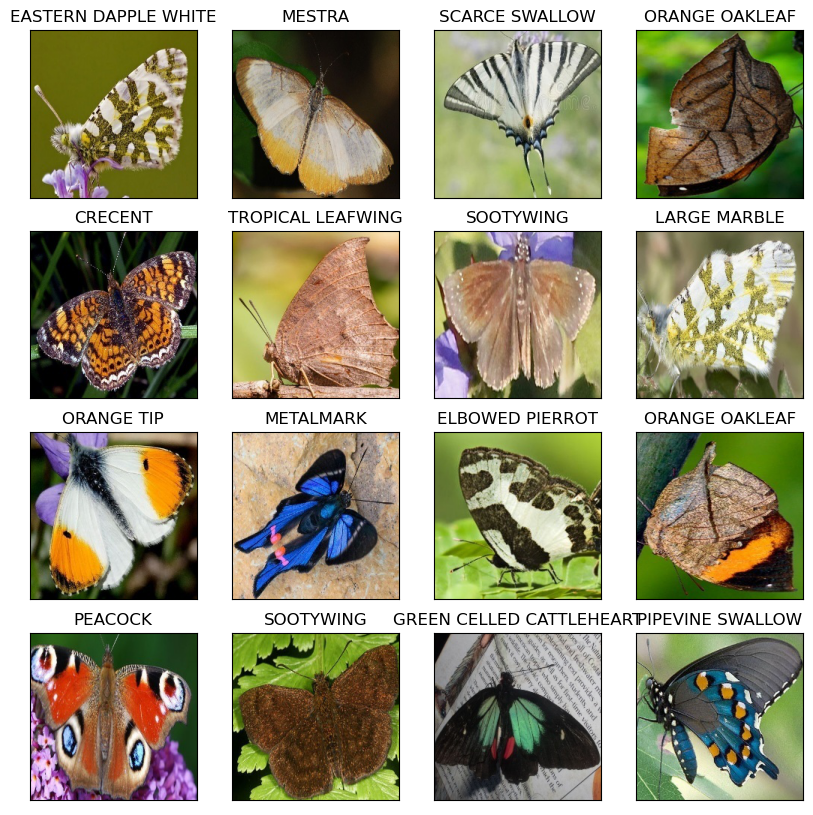

In [71]:
i = 10
plt.figure(figsize = (10, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i], cmap = plt.cm.binary)
  plt.title(class_names[labels[i]])
plt.show()

# i = 10 --> assign nilai dari variable i adalah 10
# plt.figure(figsize = (10, 10)) --> create figure baru dengan ukuran 10 10
# for i in range(16): --> looping sebanyak 16 kali
# plt.subplot(4, 4, i + 1) --> lanjutan dari looping diatas; looping untuk ukuran gambar 4x4. subplot indeks dimulai dari 1 bukan 0
# plt.xticks([]) & plt.yticks ([]) --> untuk menghapus tick marks di x dan y axes.
# plt.grid(false) --> function untuk menghilangkan grid pada image
# plt.imshow(images[i], cmap = plt.cm.binary) --> menampilkan gambar dari indeks i dari images array. Menggunakan binary colormap (plt.cm.binary)
# plt.title(class_names[labels[i]]) --> memberi title subplot pada label untuk gambar pada indeks i. Didapat dari class_names menggunakan label array.


#brandon

Design Deep Learning Architecture

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

In [73]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [74]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(bt_class_num, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

In [75]:
model.compile(
    loss = 'sparse_categorical_crossentropy', #label dijadikan int, bukan float
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
    #learning rate = proses perbaikan
    #optimalkan model
    metrics = ["accuracy"]
)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │        76,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,316,875 (58.43 MB)

 Trainable params: 15,316,875 (58.43 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model_1 = model.fit(
    train_set,
    epochs = 10,
    validation_data = val_set
)

#jumlah data 4945/ batch size 16 = 285
#setiap batch 16 gambar
#dibutuhkan 285 step untuk mencapai 1 epoch

Epoch 1/10


c:\Users\Fiona\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 1217s 4s/step - accuracy: 0.0125 - loss: 4.3338 - val_accuracy: 0.0115 - val_loss: 4.3156
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1065s 3s/step - accuracy: 0.0369 - loss: 4.1982 - val_accuracy: 0.1700 - val_loss: 3.3162
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1139s 4s/step - accuracy: 0.2656 - loss: 2.8563 - val_accuracy: 0.4892 - val_loss: 1.7902
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1183s 4s/step - accuracy: 0.5551 - loss: 1.6172 - val_accuracy: 0.6577 - val_loss: 1.2282
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1175s 4s/step - accuracy: 0.6904 - loss: 1.0921 - val_accuracy: 0.6446 - val_loss: 1.2854
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1169s 4s/step - accuracy: 0.7666 - loss: 0.8162 - val_accuracy: 0.7523 - val_loss: 0.8543
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1101s 3s/step - accuracy: 0.8013 - loss: 0.6710 - val_accuracy: 0.7938 - val_loss: 0.7460
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1102s 3s/step - accuracy: 0.8303 - loss: 0.6010 - val_accurac

Keluaran kode menunjukkan kemajuan pelatihan model selama 10 periode. Berikut beberapa metrik utama yang ditampilkan:

LOSS: Kerugian adalah ukuran seberapa cocok prediksi model dengan label data sebenarnya. Nilai kerugian yang lebih rendah menunjukkan kinerja yang lebih baik.

akurasi: Akurasi adalah persentase prediksi yang benar dari model.

val_loss: Kerugian validasi adalah kerugian yang dihitung pada set validasi.

val_accuracy: Akurasi validasi adalah akurasi yang dihitung pada set validasi.



In [81]:
def visualize(history):
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(acc) + 1)

  fig, axs = plt.subplots(1, 2, figsize = (12, 5))
  axs[0].plot(epochs, acc, 'r', label = "Training Acc")
  axs[0].plot(epochs, val_acc, 'b', label = "Validation Acc")
  axs[0].set_title("Training and Validation Accuracy")
  axs[0].legend()
  axs[0].grid(True)

  axs[1].plot(epochs, loss, 'r', label = "Training Loss")
  axs[1].plot(epochs, val_loss, 'b', label = "Validation Loss")
  axs[1].set_title("Training and Validation Loss")
  axs[1].legend()
  axs[1].grid(True)

  plt.tight_layout()
  plt.show()

  # function visualize(history) =  untuk memvisualisasikan matrix train dan validation dari model mcahine learning
  # acc = accuracy model
  # val_acc = accuracy validation model
  # loss = error/bias model
  # Val_loss = error/bias validation model
  # epoch = jumlah train yang dilakukan model
  # fig, axs = plt.subplots(1, 2, figsize = (12, 5)) = digunakan untuk membuat figure (gambar) dengan dua subplot horizontal, dengan ukuran gambar sebesar 12x5

  # axs[0].plot(epochs, acc, 'r', label = "Training Acc") = buat plot Training Acc
  # axs[0].plot(epochs, val_acc, 'b', label = "Validation Acc") = buat plot Validation Acc
  # axs[0].set_title("Training and Validation Accuracy") = buat title tulisan yang menunjukan bahwa plot ini membandingkan accuracy validationdan training
  # axs[0].legend() = legenda akan menjelaskan bahwa garis merah mewakili data train sementara garis biru mewakili data validation.
  # axs[0].grid(True) = untuk menambahkan garis batu agar mempermudah membaca plot

  # axs[1].plot(epochs, loss, 'r', label = "Training Loss") = buat plot Training Loss
  # axs[1].plot(epochs, val_loss, 'b', label = "Validation Loss") = buat plot Validation Loss
  # axs[1].set_title("Training and Validation Loss") = buat title tulisan yang menunjukan bahwa plot ini membandingkan Loss validationdan training
  # axs[1].legend() = legenda akan menjelaskan bahwa garis merah mewakili data train sementara garis biru mewakili data validation.
  # axs[1].grid(True) = untuk menambahkan garis batu agar mempermudah membaca plot

  # plt.tight_layout() = memastikan gambarnya rapi
  # plt.show() = output plot


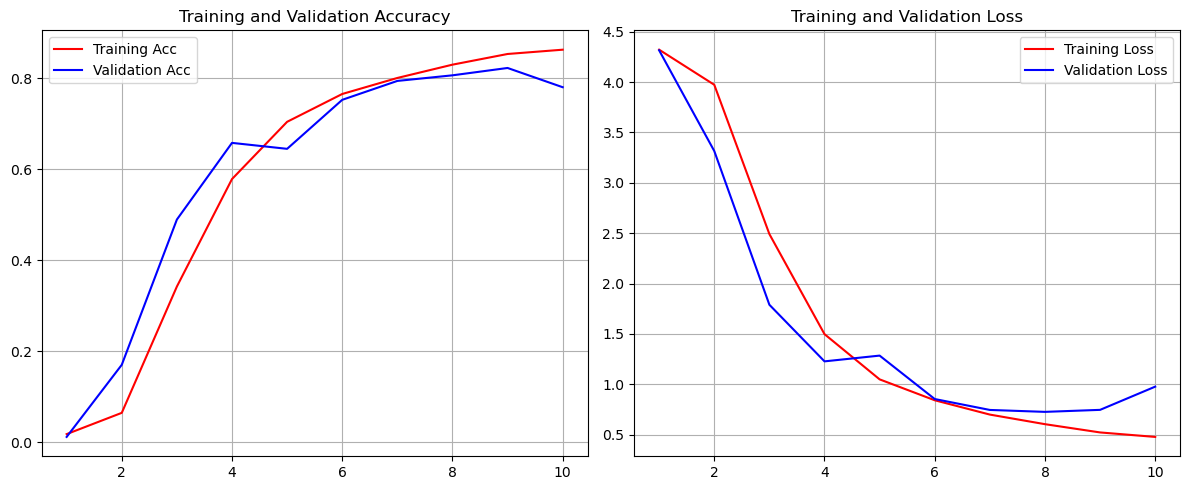

In [82]:
visualize(model_1)


##jika plotnya sudah benar
Seperti yang dapat Anda lihat dari outputnya, kerugian pelatihan dan kerugian validasi model menurun seiring waktu, yang menunjukkan bahwa model tersebut sedang belajar. Akurasi pelatihan dan akurasi validasi model juga meningkat seiring waktu, yang menunjukkan bahwa model berperforma lebih baik pada data pelatihan dan data validasi.

Secara keseluruhan, keluarannya menunjukkan bahwa model tersebut dilatih dengan baik dan menggeneralisasi data yang tidak terlihat dengan baik.

In [103]:
model.save("train_model_vgg16.h5")

In [105]:
loaded_model = load_model("train_model_vgg16.h5")

## Test

In [91]:
train_csv_path = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/Training_set.csv"
train_img_dir = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/"

test_csv_path = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/Testing_set.csv"
test_img_dir = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/test/"

In [92]:
#read the csv file
data = pd.read_csv(test_csv_path)
data.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [93]:
#add path

data['path'] = test_img_dir + data["filename"]

data.head()

,filename,path
0,Image_1.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1,Image_2.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2,Image_3.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
3,Image_4.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
4,Image_5.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


In [94]:
class_names = {0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'AN 88', 4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK', 8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW', 12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHECQUERED SKIPPER', 16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR', 20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRECENT', 24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMA', 27: 'EASTERN DAPPLE WHITE', 28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY', 32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOW', 36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE', 40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL', 44: 'MONARCH', 45: 'MOURNING CLOAK', 46: 'ORANGE OAKLEAF', 47: 'ORANGE TIP', 48: 'ORCHARD SWALLOW', 49: 'PAINTED LADY', 50: 'PAPER KITE', 51: 'PEACOCK', 52: 'PINE WHITE', 53: 'PIPEVINE SWALLOW', 54: 'POPINJAY', 55: 'PURPLE HAIRSTREAK', 56: 'PURPLISH COPPER', 57: 'QUESTION MARK', 58: 'RED ADMIRAL', 59: 'RED CRACKER', 60: 'RED POSTMAN', 61: 'RED SPOTTED PURPLE', 62: 'SCARCE SWALLOW', 63: 'SILVER SPOT SKIPPER', 64: 'SLEEPY ORANGE', 65: 'SOOTYWING', 66: 'SOUTHERN DOGFACE', 67: 'STRAITED QUEEN', 68: 'TROPICAL LEAFWING', 69: 'TWO BARRED FLASHER', 70: 'ULYSES', 71: 'VICEROY', 72: 'WOOD SATYR', 73: 'YELLOW SWALLOW TAIL', 74: 'ZEBRA LONG WING'}
class_names = list(class_names.values())
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

In [98]:
import os

# Cek direktori kerja saat ini
print(os.getcwd()) 

# Cek file dalam direktori test
print(os.listdir("C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/test/"))


c:\Users\Fiona\Documents\coolyeah\Semester 4\Deep Learning\Project\butterfly_classification
['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_1000.jpg', 'Image_1001.jpg', 'Image_1002.jpg', 'Image_1003.jpg', 'Image_1004.jpg', 'Image_1005.jpg', 'Image_1006.jpg', 'Image_1007.jpg', 'Image_1008.jpg', 'Image_1009.jpg', 'Image_101.jpg', 'Image_1010.jpg', 'Image_1011.jpg', 'Image_1012.jpg', 'Image_1013.jpg', 'Image_1014.jpg', 'Image_1015.jpg', 'Image_1016.jpg', 'Image_1017.jpg', 'Image_1018.jpg', 'Image_1019.jpg', 'Image_102.jpg', 'Image_1020.jpg', 'Image_1021.jpg', 'Image_1022.jpg', 'Image_1023.jpg', 'Image_1024.jpg', 'Image_1025.jpg', 'Image_1026.jpg', 'Image_1027.jpg', 'Image_1028.jpg', 'Image_1029.jpg', 'Image_103.jpg', 'Image_1030.jpg', 'Image_1031.jpg', 'Image_1032.jpg', 'Image_1033.jpg', 'Image_1034.jpg', 'Image_1035.jpg', 'Image_1036.jpg', 'Image_1037.jpg', 'Image_1038.jpg', 'Image_1039.jpg', 'Image_104.jpg', 'Image_1040.jpg', 'Image_1041.jpg', 'Image_1042.jpg', 'Image_1043.jpg',

In [96]:
import matplotlib.image as mimg

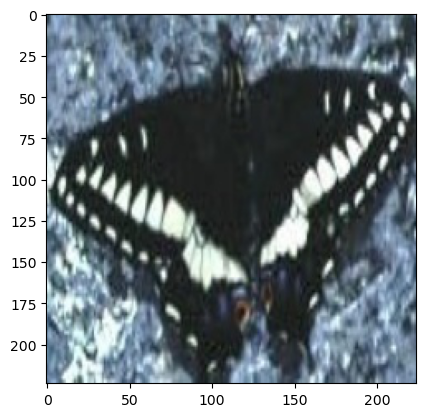

In [97]:
i = 1001
img_path = data['path'][i]

#asumsi 'img_path' sudah terdefinisi dalam code
img = mimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [100]:
from tensorflow.keras.preprocessing import image

In [101]:
#load and pre-process test image
##replace with the actual path
img_path = data['path'][i]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

#rescale pixel values
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis = 0)

In [106]:
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

print("Predicted Class: ", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Predicted Class:  INDRA SWALLOW


## Evaluasi

In [86]:
train_csv_path = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/Training_set.csv"
train_img_dir = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/"

test_csv_path = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/Testing_set.csv"
test_img_dir = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/test/"

In [87]:
import os

# Cek direktori kerja saat ini
print(os.getcwd())

# Cek file dalam direktori test
print(os.listdir("C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/"))


c:\Users\Fiona\Documents\coolyeah\Semester 4\Deep Learning\Project\butterfly_classification
['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_1000.jpg', 'Image_1001.jpg', 'Image_1002.jpg', 'Image_1003.jpg', 'Image_1004.jpg', 'Image_1005.jpg', 'Image_1006.jpg', 'Image_1007.jpg', 'Image_1008.jpg', 'Image_1009.jpg', 'Image_101.jpg', 'Image_1010.jpg', 'Image_1011.jpg', 'Image_1012.jpg', 'Image_1013.jpg', 'Image_1014.jpg', 'Image_1015.jpg', 'Image_1016.jpg', 'Image_1017.jpg', 'Image_1018.jpg', 'Image_1019.jpg', 'Image_102.jpg', 'Image_1020.jpg', 'Image_1021.jpg', 'Image_1022.jpg', 'Image_1023.jpg', 'Image_1024.jpg', 'Image_1025.jpg', 'Image_1026.jpg', 'Image_1027.jpg', 'Image_1028.jpg', 'Image_1029.jpg', 'Image_103.jpg', 'Image_1030.jpg', 'Image_1031.jpg', 'Image_1032.jpg', 'Image_1033.jpg', 'Image_1034.jpg', 'Image_1035.jpg', 'Image_1036.jpg', 'Image_1037.jpg', 'Image_1038.jpg', 'Image_1039.jpg', 'Image_104.jpg', 'Image_1040.jpg', 'Image_1041.jpg', 'Image_1042.jpg', 'Image_1043.jpg',

In [88]:
data = pd.read_csv(train_csv_path)
data.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [89]:
#add path

data['path'] = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/train/"+ data["filename"]

data.head()

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1,Image_2.jpg,ADONIS,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2,Image_3.jpg,BROWN SIPROETA,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
3,Image_4.jpg,MONARCH,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
4,Image_5.jpg,GREEN CELLED CATTLEHEART,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


In [90]:
#split data
train_data, val_data = train_test_split(data, test_size = 0.2, random_state = 10)

# train_data --> data yang digunakan untuk training
# val_data --> data yang digunakan untuk menguji atau mengevaluasi
# train_test_split --> function untuk melakukan training data (membagi 2 data menjadi train_data dan val_data); training dan validasi
# test_size --> untuk membagi jumlah yang data yang ditraining dan validasi (0.3 berarti validasinya 30% dan trainingnya 70%)
# random_state --> untuk menentukan seed atau nilai awal random generator dari hasil pembagian data set



In [107]:
train_data.head()


,filename,label,path
2705,Image_2706.jpg,MANGROVE SKIPPER,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2120,Image_2121.jpg,MANGROVE SKIPPER,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2145,Image_2146.jpg,QUESTION MARK,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2756,Image_2757.jpg,YELLOW SWALLOW TAIL,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
398,Image_399.jpg,GREAT EGGFLY,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


In [108]:
val_data.head()


,filename,label,path
5748,Image_5749.jpg,PURPLISH COPPER,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2529,Image_2530.jpg,BECKERS WHITE,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
5030,Image_5031.jpg,APPOLLO,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
5143,Image_5144.jpg,ELBOWED PIERROT,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1551,Image_1552.jpg,BANDED ORANGE HELICONIAN,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


In [109]:
test_data = pd.read_csv(test_csv_path)
test_data['path'] = "C:/Users/Fiona/Documents/coolyeah/Semester 4/Deep Learning/Project/butterfly_classification/test/"+ test_data["filename"]
test_data.head()

,filename,path
0,Image_1.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
1,Image_2.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
2,Image_3.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
3,Image_4.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...
4,Image_5.jpg,C:/Users/Fiona/Documents/coolyeah/Semester 4/D...


In [110]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_set = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = "sparse"
    )

val_datagen = ImageDataGenerator(rescale = 1.0 / 255)

val_set = train_datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = "sparse"
    )

# train_datagen dan val_datagen = menggunakan Image Data Generator mempersiapkan gambar-gambar agar model machine learning dapat belajar lebih efektif.
# rescale = 1.0 / 255 mengubah nilai piksel gambar menjadi rentang antara 0 dan 1. membantu dalam pelatihan model dan meningkatkan kinerja model.

# flow_from_dataframe = memungkinkan mengubah data pada dataframe menjadi aliran data yang sesuai untuk train dan validation machine learning.
# dataframe = sumber data
# x_col = column gambar
# y_col = column label/clasess
# target_size = ukuran target adalah 180px * 180px
# class_mode = bahwa label kelas yang digunakan adalah bilangan bulat (integer)

#louis

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'val_set' is your validation data generator
y_true = []
y_pred = []
for _ in range(len(val_set)):  # Iterate over batches in the validation set
    x_val, y_val = next(val_set)
    y_pred_batch = loaded_model.predict(x_val)
    y_pred_batch = np.argmax(y_pred_batch, axis=1)  # Get predicted class labels
    y_true.extend(y_val)
    y_pred.extend(y_pred_batch)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Adjust 'average' as needed
recall = recall_score(y_true, y_pred, average='macro')  # Adjust 'average' as needed
f1 = f1_score(y_true, y_pred, average='macro')  # Adjust 'average' as needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\Fiona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
